# Introduction to Exploritary Data Analysis
Analyzing a dataset typically involves several key steps :
- Step 0: Imports and Reading data
- Step 1: data Understanding
- Step 2: data Prep
- Step 3: Feature Understanding
- Step 4: Feature Relationships
- Step 5: Analyse Hypothese
- Step 6: data Cleaning
- Step 7: Model Building (If Applicable):
- Step 8: Model Evaluation:
- Step 9: Feature Engineering:
- Step 10: Feature Scalling:


# Step 0: Imports and Reading data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as sc
import statistics as st
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
plt.style.use('dark_background')
# plt.style.use('ggplot')

# df = pd.read_excel('C:/Users/ACTOAT/Desktop/p4/py/Physical_Test.xlsm',3)
data = pd.read_csv('D:\Paractical data scientist\zamato\zomato.csv')
df = data.copy()

## Step 1: data Understanding
- Analysis the shape : We'll just focus on the form of data : Ndr of rows & columns :

In [13]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


- Columns description
- - url contains the url of the restaurant in the zomato website
- - address contains the address of the restaurant in Bengaluru
- - name contains the name of the restaurant
- - online_order whether online ordering is available in the restaurant or not
- - book_table table book option available or not
- - rate contains the overall rating of the restaurant out of 5
- - votes contains total number of rating for the restaurant as of the above mentioned date
- - phone contains the phone number of the restaurant
- - location contains the neighborhood in which the restaurant is located
- - rest_type restaurant type
- - dish_liked dishes people liked in the restaurant
- - cuisines food styles, separated by comma
- - approx_cost(for two people) contains the approximate cost for meal for two people
- - reviews_list list of tuples containing reviews for the restaurant, each tuple
- - menu_item contains list of menus available in the restaurant
- - listed_in(type) type of meal
- - listed_in(city) contains the neighborhood in which the restaurant is listed

In [14]:
df.shape  

(51717, 17)

In [15]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

- Elements of Structured data : 
    - % of each types of values data : 
    Unstructured data can be broken down into a couple of forms:
        - Continuous Numerical data that  can be infinitely divided (i.e. Weight)
        - Discrete Numerical data that cannot be divided (i.e. Year of birth)
        - Categorical Binary: data where there are only two options
        - Categorical Ordinal: data where the order of it matters
    - Descriptive the data : (count rows, mean, std, min, mediane in 50% , max) of each column ,Percentile in 25% 50% 75% :standard deviation formula
    - Descriptive the data variable : (min & max value is larger than zero or not)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [17]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


<Axes: ylabel='proportion'>

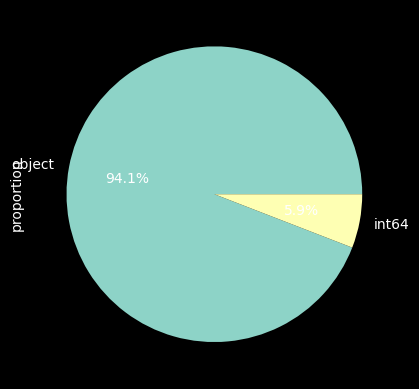

In [18]:
plt.figure()
df.dtypes.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

# Step 2: data Preperation

- Dropping irrelevant columns and rows

In [19]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


- - Cleaning Column

In [20]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [21]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
df['rate'] = df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [22]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
df['Cost2plates'] = df['Cost2plates'].apply(handlecomma)
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [23]:
rest_types = df['rest_type'].value_counts(ascending  = False)
df['rest_type'].value_counts()

rest_type
Quick Bites                      19132
Casual Dining                    10330
Cafe                              3732
Delivery                          2604
Dessert Parlor                    2263
Takeaway, Delivery                2037
Casual Dining, Bar                1154
Bakery                            1141
Beverage Shop                      867
Bar                                697
Food Court                         624
Sweet Shop                         468
Bar, Casual Dining                 425
Lounge                             396
Pub                                357
Fine Dining                        346
Casual Dining, Cafe                319
Beverage Shop, Quick Bites         298
Bakery, Quick Bites                289
Mess                               267
Pub, Casual Dining                 255
Sweet Shop, Quick Bites            178
Kiosk                              176
Dessert Parlor, Cafe               175
Cafe, Casual Dining                173
Cafe, Bakery   

In [24]:
rest_types = df['rest_type'].value_counts(ascending  = False)
df['rest_type'].value_counts()
rest_types_lessthan1000 = rest_types[rest_types<1000]
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

rest_type
Quick Bites           19132
Casual Dining         10330
others                 9097
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Name: count, dtype: int64